I) The period of a pendulum of length l oscillating at a large angle $\alpha$ is given by
$$
T=T_{0} \frac{\sqrt{2}}{\pi} \int_{0}^{\alpha} \frac{d \theta}{(\cos \theta-\cos \alpha) \frac{1}{2}}
$$
where
$$
T_{0}=2 \pi \sqrt{\frac{l}{g}}
$$
is the period of the same pendulum at small amplitudes. Any numerical evaluation of the integral as is would fail (explain why). If we change the variable by writing:
$$
\sin \frac{\theta}{2}=\sin \frac{\alpha}{2} \sin \phi
$$
we can get:
$$
T=\frac{2 T_{0}}{\pi} \int_{0}^{\frac{\pi}{2}} \frac{d \phi}{\left(1-\sin ^{2} \frac{\alpha}{2} \sin ^{2} \phi\right)^{\frac{1}{2}}}
$$
which is a well-behaved integral. Write a program to use the above integral to calculate the ratio $T/T_0$ for integral amplitudes $0^\circ \le\alpha \le 90^\circ$. Output these values as a pandas dataframe showing the amplitude in degrees and radians as well as $T/T_0$, and make a plot with the two columns. Explain the result when $\alpha = 0.$ 

Para responder a la pregunta de ¿por qué θ no puede tomar cualquier valor entre 0 y α? 
resulta que si α=θ, el denominador de la integral se hace cero y por tanto obtendremos una indeterminación. Para otro valor diferente de cero y <=α, la raíz en el denominador será negativa y por tanto tendría soluciones complejas, lo cuál no tiene sentido para un periodo.




In [149]:
from scipy import interpolate
from scipy.misc import derivative
from scipy import integrate
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [150]:
α = np.linspace(0, np.pi/2) #Ángulos en radianes
α_grad = α*180/np.pi #Ángulos en grados


In [303]:
a = 0 # límite superior de la integral
b = np.pi/2 # límite inferior de la integral

def f(α, a, b):
  e = np.sin(0.5*α)
  return integrate.quad(lambda x: 1/(1-e**2*np.sin(x)**2)**0.5, a, b)[0]
#Evaluemos la integral para cada uno de los valores de los ángulos
I = np.zeros(len(α))
for i in range(0, len(α)):
  I[i]= f(α[i], a, b)

In [304]:
#Hallemos T/T0
T_T0 = (2/np.pi)*I

In [305]:
#Dataframe
df = pd.DataFrame({'Áng. grados': α_grad, 'Áng. radianes': α, 'T/T0': T_T0 })
df[:5]

,Áng. grados,Áng. radianes,T/T0
0,0.000000,0.000000,1.000000
1,1.836735,0.032057,1.000064
2,3.673469,0.064114,1.000257
3,5.510204,0.096171,1.000578
4,7.346939,0.128228,1.001029


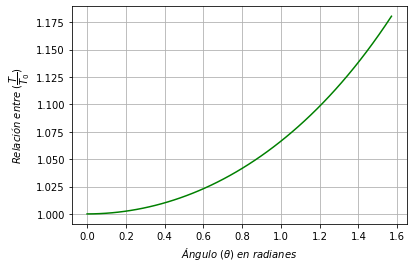

In [309]:
plt.plot(α, T_T0, 'g-' )
plt.xlabel('$Ángulo$ $(θ)$ $en$ $radianes$')
plt.ylabel('$Relación$ $entre$ $(\dfrac{T}{T_0})$')
plt.grid()

Cuando Alfa es igual a cero, se tiene que el periodo para bajas oscilaciones; es decir:
$$
T_{0}=2 \pi \sqrt{\frac{l}{g}}
$$

II)
### Casas-Ibarra parameterization
Consider a $n\times n$ symmetric matrix $A$. We can assumme without lost of generality that this can be generated from a matrix $Y$ such that
$$
A=Y^{\operatorname{T}}Y
$$
Theorem 1 gurantees that exists an ortogonal matrix $U$ such that
$$
U^{\operatorname{T}} A U=U^{\operatorname{T}} Y^{\operatorname{T}}Y U=D_\lambda
$$
where
$$
D_{\lambda}=A_{\text{diag}}=\operatorname{diag}\left(\lambda_1,\lambda_2,\ldots,\lambda_n\right)
$$
where $\lambda_i$ are the eigenvalues of $A$. Therefore
\begin{align}
 Y^{\operatorname{T}}Y =&U D_\lambda U^{\operatorname{T}}\\
 =&U D_{\sqrt{\lambda}} D_{\sqrt{\lambda}} U^{\operatorname{T}}\\
\end{align}
where
$$
D_{\sqrt{\lambda}}=\operatorname{diag}\left(\sqrt{\lambda_1},\sqrt{\lambda_2},\ldots \sqrt{\lambda_n}\right)
$$
Therefore, exists an ortogonal arbitrary matrix $R$, such that
$$
 Y^{\operatorname{T}}Y =U D_{\sqrt{\lambda}}R^{\operatorname{T}}R D_{\sqrt{\lambda}} U^{\operatorname{T}}\\
$$

In this way, the matrix $Y$ can be parameterized in terms of $R$ as
$$
Y=R D_{\sqrt{\lambda}} U^{\operatorname{T}}
$$


1) By using the previous equations, build a matrix $Y$ $2\times 2$ with the following conditions
* $R$ is an orthogonal matrix with a mixing angle as a random number between $(0,2\pi)$. Use your identification number as the seed of the random number generator.
* The eigenvalues are $\lambda_1=2$ and $\lambda_2=4$. 
* $U$ is a diagonalization matrix with mixing angle $\pi/4$
2) Build the matrix $A$ and check that has the proper eigenvalues and eigenvectors

In [265]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

In [266]:
np.random.seed(1036645734) 
t = np.random.uniform(0,2*np.pi)

In [267]:
#Se definirá la matriz R
def R(θ):
    return np.array( [[np.cos(θ) ,np.sin(θ)],
                      [-np.sin(θ),np.cos(θ)]]   )

In [268]:
R(t)

array([[ 0.98350102, -0.18090255],
       [ 0.18090255,  0.98350102]])

In [269]:
R

<function __main__.R>

In [270]:
#Matriz de Diagonalización
D = np.diag([2,4])
D

array([[2, 0],
       [0, 4]])

In [271]:
#Matriz raíz de D
D_r = np.sqrt(D).round(2)
D_r

array([[1.41, 0.  ],
       [0.  , 2.  ]])

In [272]:
#Se definirá U^T
np.random.seed(1036645734) 
s = np.random.uniform(0,np.pi/4)
def U(θ):
    return np.array( [[np.cos(θ) ,np.sin(θ)],
                      [-np.sin(θ),np.cos(θ)]]   )


In [273]:
U(s)

array([[ 0.72300081,  0.69084718],
       [-0.69084718,  0.72300081]])

In [274]:
np.transpose?

In [275]:
UT = np.transpose(U(s))
UT

array([[ 0.72300081, -0.69084718],
       [ 0.69084718,  0.72300081]])

In [276]:
# Se determinará Y
#Multiplication
Y = np.dot(R(t), np.dot(D_r, UT) )
Y


array([[ 0.75265953, -1.21960835],
       [ 1.54331552,  1.24592789]])

In [277]:
# Se determina YT
YT = np.transpose(Y)
YT

array([[ 0.75265953,  1.54331552],
       [-1.21960835,  1.24592789]])

In [278]:
# YT*Y = A
A = np.dot(YT, Y)
A

array([[2.94831917, 1.00490999],
       [1.00490999, 3.03978083]])

In [279]:
# Veamos si A es Hermítica, i.e, (AT)*=A
# Se determina AT
AT = np.transpose(A)
AT

array([[2.94831917, 1.00490999],
       [1.00490999, 3.03978083]])

In [280]:
AH = np.conjugate(AT)
AH

array([[2.94831917, 1.00490999],
       [1.00490999, 3.03978083]])

In [289]:
#Hallemos los valores propios de A y corroboremos con los dados
from scipy import linalg


In [290]:
λ,V=np.linalg.eig(A)


In [292]:
# Autovalores
A_diag=np.diag(λ)
A_diag

array([[1.9881, 0.    ],
       [0.    , 4.    ]])

In [294]:
# Autovectores
V

array([[-0.72300081, -0.69084718],
       [ 0.69084718, -0.72300081]])

In [295]:
#Verifiquemos el orden correcto
np.dot(np.dot(V.transpose(), A), V).round(14)

array([[1.9881, 0.    ],
       [0.    , 4.    ]])

Efectivamente se obtuvo los mismos autovalores dados los métodos anteriores y en el orden correcto.